# Preparation

In [ ]:
!pip install -q pyomo
!apt install coinor-cbc
!apt install glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5 coinor-libosi1v5
The following NEW packages will be installed:
  coinor-cbc coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5 coinor-libosi1v5
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,908 kB of archives.
After this operation, 8,310 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libcoinutils3v5 amd64 2.11.4+repack1-2 [465 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libosi1v5 amd64 0.108.6+repack1-2 [275 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coino

# Introduction

## Recap

* Exact Solutions
  * LP: Simplex
  * NLP
    * Analytical: método da derivada, relaxação lagrangiana...
    * Numerical: método do gradiente, método de newton...
  * ILP: Linear relaxation and Branch-and-bound

* Classical Optimization
  * Exact Methods (all methods above)
  * **Heuristics** (approximate solutions, but without optimum guarantees)

## Objective

When we talk about integer programming or even combinatorial optimization, we know that there are some ways to solve them.

**Exact methods** such as Branch-and-bound find the optimal solution to the problem at a relatively high cost, but other methods, even though they do not guarantee the optimum, can provide good approximations. In addition to meta-heuristics, we can develop specific heuristics for a given problem.

In this material, we want to investigate the **main algorithmic strategies for building optimization heuristics**. Below, we list two reasons for doing this study:

1. Knowing the strategies will allow us to **recognize which ones to use when we are faced with a new heuristic**, in a book or paper, for example. This gives us greater **familiarity with the algorithms** and allows us to **understand the advantages and limitations of the algorithm used**.
2. Several **classical problems have well-known heuristics** (which employ the strategies we have studied) that can be useful when dealing with new problems. Remember that it is very common to reduce one problem to another (transform one problem into another) and this can even be useful to **combine with a metaheuristic solution**.

# Exhaustive search

Exhaustive (or brute force) search consists of **enumerating and evaluating each of the feasible solutions** in order to indicate which of them is the global solution. This is equivalent to solving the problem for all its possible solutions. In binary problems with $n$ variables, for example, exhaustive search consists of generating each of the $2^n$ solutions and evaluating one at a time, to determine the best one.

This strategy is not a heuristics properly. Since exhaustive search investigates all possible cases, we are guaranteed that the solution found is optimum and that it is the global optimum.

In terms of memory usage, the method can be efficient, if we find strategies to generate one solution at a time. This way, we store only the best solution found. If we find a better solution, we replace the previous one.

In terms of computing time, however, this method is quite inefficient and therefore **it is not a method used by itself** in combinatorial problems. This is because the number of combinations is, in these cases, quite high. However, this method can be useful in some cases:

* To evaluate the quality of a solution found by another candidate strategy.
* When combined with other strategies that reduce the size of the problem (e.g., divide-and-conquer), making it tractable through exhaustive search.

# Greedy Search

Portanto, para alguns problemas, a busca gananciosa leva ao ótimo global, mas para a maioria dos problemas a busca gananciosa é apenas uma aproximação, que é muito eficiente em termos de tempo computacional.


**O algoritmo de Djikstra usa uma abordagem gananciosa**.

> A solução deste problema é a definição de quais enlaces pertencem ao caminho desejado. O enlace $(i,j)$ pertence ao caminho quando $x_{ij} = 1$. \\
> Neste caso, o algoritmo vai montar a solução tornando 1 uma variável de decisão $x_{ij}$ por vez. A variável que é escolhida a cada passo é aquela que dá o menor incremento à distância, naquela rodada. \\
> Observe que, a abordagem gananciosa neste problema encontra a solução ótima.

Greedy search approaches an optimization problem by assigning values ​​to the decision variables one by one, **always keeping the solution feasible** and, in each assignment, making **the best available decision** <u>irrevocably</u>.

This approach assumes a heuristic for decision making that provides the best possible move at each step, the best “profit”, hence the name greedy. The approach is also called myopic (in contrast to a blind search), since making the optimal decisions at each separate step <u>does not always</u> result in the global solution.

Whereas greedy search leads to the global optimum for some problems, this strategy is only an approximation for most optimization problems, but a very efficient one (in terms of computing time).

**Djikstra's algorithm uses a greedy approach**.

> The solution to this problem is to define which links belong to the desired path. The link $(i,j)$ belongs to the path when $x_{ij} = 1$.

> In this case, the algorithm will build the solution by making $x_{ij} = 1$ for one pair $i,j$ at a time. The variable that is chosen at each step is the one that gives **the smallest increment** to the distance, in that round.

> Note that, the greedy approach in this problem finds the optimal solution.

# Divide and Conquer

Sometimes it is a good idea to solve a complicated problem by breaking it down into smaller, simpler problems. You can then solve the smaller, easier problems and then find a way to aggregate the final solution from each part.

This approach is not always computationally cost-effective and may not always be usable, since combining all the parts into a complete solution may not be feasible depending on the problem.

The pseudo-code below illustrates the general idea of ​​a divide and conquer algorithm.

$
\text{D\&C}(P): \\
\;\; \text{break problem P into subproblems } P_1,\ldots,P_k \\
\;\; \text{for } i = 1 \text{ to } k \text{ do} \\
\;\;\;\; \text{if } \text{tamanho(}P_i) \lt \rho \text{ then  solve } P_i \text{ (store } s_i \text{)} \\
\;\;\;\; \text{else } s_i = \text{D\&C}(P_i) \\
\;\; \text{combine all } s_i \text{ in the final solution} \\
$

Um exemplo de divisão e conquista para o problema de achar o menor valor em um vetor de números pode ser obtido subdividindo o vetor em grupos de dois elementos e depois combinando os resultados.

# Dynamic Programming

**When can I use dynamic programming?**
* **Optimal substructure**: a globally optimal solution can be found by combining optimal solutions of local subproblems
* **Overlapping subproblems**: finding the optimal solution involves solving the same subproblem multiple times.

The idea of ​​dynamic programming is to avoid duplicating work. We trade off time (computation) for space (memory) by storing solutions to overlapping problems and using them when necessary.

We use a table to store the solutions of already computed subproblems. Thus, before computing a new subproblem
* We check if that subproblem is in the table
* If it is, we use the stored solution
* If it is not, we compute the solution and store it in the table

This technique is called **memoization**.

### Exemplo - Fibonacci

Just to illustrate the use of dynamic programming, we will consider the case of generating the numbers of the Fibonacci sequence (1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89 $\ldots$). Such that

$\text{fib}(n) = \text{fib}(n-1) + \text{fib}(n-2)$

The recursive solution to this problem is as follows.

In [ ]:
def fib(n):
  if n == 0 or n == 1:
    return 1
  else:
    return fib(n - 1) + fib(n - 2)
fib(6)

13

The figure below shows the solution tree for this case. Note that the solution to the problem $\text{fib}(n)$ is given by the combination (sum) of the solutions to the subproblems $\text{fib}(n-1)$ and $\text{fib}(n-2)$. Therefore, we have <u>optimal substructure</u>.

Also note that we have repetitions of several computations. The item $\text{fib}(0)$, for example, is computed 5 times, and the item $\text{fib}(1)$ is computed 8 times. The same happens for other subproblems. This shows that we have <u>overlapping problems</u>.

Therefore, we can use dynamic programming.

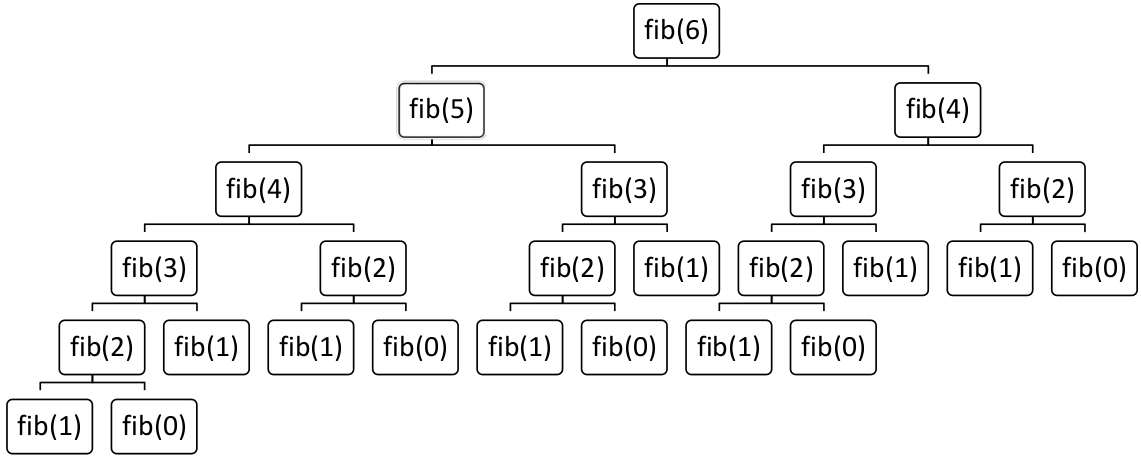

Usaremos um dicionário para ser a tabela que armazenará resultados já computados. Execute o código abaixo e compare o tempo contra a solução sem programação dinânica.

In [ ]:
def fibPD(n, memo = {}):
  if n == 0 or n == 1:
    return 1
  try:
    return memo[n]
  except KeyError:
    result = fibPD(n-1, memo) + fibPD(n-2, memo)
    memo[n] = result
  return result

In [ ]:
#sem programação dinamica
fib(40)

165580141

In [ ]:
#com programação dinamica
fibPD(40)

165580141

## Summary

**Exhaustive search**: Enumerates and evaluates each of the solutions, finding the optimum.

**Greedy search**: Builds the solution incrementally, making choices at each step in search of improving the objective function.

**Divide and conquer**: Breaks the problem into <u>independent problems</u>, solves each subproblem, and combines the solutions.

**Dynamic programming**: Breaks the problem into <u>overlapping problems</u>, and builds solutions for increasingly larger subproblems

# Exemplo: Knapsack Problem

$c_j$ = utility of object $j$

$p_j$ = weight of object $j$

$C_{max}$ = knapsack capacity

$x_j$ = decision variable, assumes 1 if object is in knapsack and 0 otherwise

$
\max z = \sum_{j=1}^{n} c_jx_j \\
s.t. \\
\sum_{j=1}^{n} p_jx_j \leq C_{max} \\
x_j \in \{0,1\}
$

## Exemplo

You are going to have lunch and you know the preference values ​​of different foods (e.g. you like apples more than donuts), but you have a calorie limit (e.g. you don't want to eat more than 800 kcal). Choosing what to eat is a backpack problem. Assume a 1000 calorie limit.

|Food|	Utility|	Calories|
|---|---|---|
|Wine|	89|	123|
|Beer|	90|	154|
|Pizza|	30|	258|
|Sandwich|	50|	454|
|Fries|	90|	565|
|Coke|	79|	150|
|Apple|	90|	95|
|Donut|	10|	195|

$u_j$ = is the utility of the food

$p_j$ = is the calorie of the food

$C_{max}$ = calorie limit

$x_j$ = binary variable that assumes 1 if the food is chosen and 0 otherwise

$\max \sum_j u_j x_j \\
s.t.\\
\sum_j p_jx_j \leq C_{max} \\
x_j \in \{0,1\}$

In [ ]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

cmax = 1000

objetos = {
    "Wine":[89,123],
    "Beer":[90,154],
    "Pizza": [30,258],
    "Sandwich":	[50,454],
    "Fries":	[90,565],
    "Cole":	[79,150],
    "Apple":	[90,95],
    "Donut": [10,195]
}

# declare decision variables
model.x = Var(objetos.keys(), domain=Binary)

# declare objective
model.util = Objective(expr = sum(v[0] * model.x[k] for k,v in objetos.items()), sense=maximize)

# declare constraints
model.r1 = Constraint(expr = sum(v[1] * model.x[k] for k,v in objetos.items()) <= cmax)

model.pprint()

msolver = SolverFactory('cbc', executable='/usr/bin/cbc')
#msolver = SolverFactory('glpk', executable='/usr/bin/glpsol')
msolver.solve(model, tee=True)

# display solution
print('\nUtility = ', model.util())

print('\nDecision Variables')
for k,v in objetos.items():
  print(k,' = ', model.x[k]())

print('\nConstraints')
print('R1  = ', model.r1())

1 Var Declarations
    x : Size=8, Index={Vinho, Fritas, Cerveja, Sanduíche, Pizza, Maçã, Coca, Donut}
        Key       : Lower : Value : Upper : Fixed : Stale : Domain
          Cerveja :     0 :  None :     1 : False :  True : Binary
             Coca :     0 :  None :     1 : False :  True : Binary
            Donut :     0 :  None :     1 : False :  True : Binary
           Fritas :     0 :  None :     1 : False :  True : Binary
             Maçã :     0 :  None :     1 : False :  True : Binary
            Pizza :     0 :  None :     1 : False :  True : Binary
        Sanduíche :     0 :  None :     1 : False :  True : Binary
            Vinho :     0 :  None :     1 : False :  True : Binary

1 Objective Declarations
    util : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 89*x[Vinho] + 90*x[Cerveja] + 30*x[Pizza] + 50*x[Sanduíche] + 90*x[Fritas] + 79*x[Coca] + 90*x[Maçã] + 10*x[Donut]

1 Constraint Declarations
  

## Solution by exhaustive search

Above we gave a solution using a solver that employs the Branch-and-Bound algorithm. Another way to solve this problem is by brute force.

Since this is a combinatorial optimization problem, we can easily develop an algorithm for this. The set of all possible solutions is the powerset of the items set. Thus, for $n$ items, we have $2^n$ subsets.

In [ ]:
def powerset(C):
    powerset = [[]]
    for e in C:
        subsets = []
        for subset in powerset:
            subsets = subsets + [subset + [e]]
        powerset = powerset + subsets
    return powerset

Pobjetos = powerset(objetos.keys())

objetivo = 0
sol = None
Cmax = 1000

for solucao in Pobjetos:
  peso = 0
  util = 0
  for i in solucao:
    util += objetos[i][0]
    peso += objetos[i][1]
  if peso <= Cmax:
    if util > objetivo:
      objetivo = util
      sol = solucao

print("obj", objetivo)
print(sol)

obj 398
['Vinho', 'Cerveja', 'Sanduíche', 'Coca', 'Maçã']


Another way to perform an exhaustive search is to investigate all decision variables as a vector of binary numbers and investigate each of the $2^n$ vectors of binary numbers.

It should be noted that in this case we will continue to investigate each of the solutions and, therefore, there is no change in the time complexity of the algorithm. However, there is less memory complexity.

In the previous case, using the powerset, we store each of the subsets in memory as a list, which results in a complexity of $O(2^n)$ in terms of memory. On the other hand, using the solution below, each case is encoded as an integer, which requires less memory space.

In [ ]:
def calc_util_peso(x, lstUtil, lstPeso):
  i = len(lstUtil)
  peso = 0
  util = 0

  while x != 0:
    i = i - 1
    xi = x & 1
    util += lstUtil[i]*xi
    peso += lstPeso[i]*xi
    x = x >> 1

  return util, peso

def calc_sol(x,objs):
  i = len(objs)
  sol = []

  while x != 0:
    i = i - 1
    xi = x & 1
    if xi:
      sol.append(objs[i])
    x = x >> 1

  return sol

n = len(objetos.keys())

objs = []
lstUtil = []
lstPeso = []

for k,v in objetos.items():
  objs.append(k)
  lstUtil.append(v[0])
  lstPeso.append(v[1])

objetivo = 0
sol = None
Cmax = 1000

for x in range(2**n):
  util, peso = calc_util_peso(x,lstUtil,lstPeso)
  if peso <= Cmax:
    if util > objetivo:
      objetivo = util
      sol = x

print("obj", objetivo)
print(calc_sol(sol,objs))

obj 398
['Maçã', 'Coca', 'Sanduíche', 'Cerveja', 'Vinho']


* Da raiz criamos dois subproblemas, o problema da esquerda considera que o item 1 é levado na mochila, o problema da direita considera que o item 1 não é levado na mochila
* Do nó da esquerda no primeiro nível, criamos dois novos subproblemas: um à esquerda considerando que o item 2 é levado na mochila; e um à direita considerando que o item 2 não é levado na mochila. Esta mesma subdivisão é criada para o nó da direita no primeiro nível.

O algoritmo consiste em percorrer toda esta árvore em busca da solução ótima.

We can also perform an exhaustive search solution using a binary tree (note that the knapsack problem is a binary problem). In this tree, each node is a subproblem:
* The root is the subproblem considering that none of the items are put in the knapsack
* From the root we create two subproblems, the problem on the left considers that item 1 is carried in the knapsack, the problem on the right considers that item 1 is not carried in the knapsack
* From the node on the left at the first level, we create two new subproblems: one on the left considering that item 2 is carried in the knapsack; and one on the right considering that item 2 is not carried in the knapsack. This same subdivision is created for the node on the right at the first level.

The algorithm consists of traversing this entire tree in search of the optimal solution.

In [ ]:
def util(item):
  return objetos[item][0]

def peso(item):
  return objetos[item][1]

def buscaEmArvore(restantes, capDisp):
    """
    depth-first recursive search
      restantes: is a list of items that have not yet been added,
      capDisp: is the available capacity in the knapsack
      Returns: a tuple with the total utility of the solution to the knapsack problem and the items in that solution
    """
    if restantes == [] or capDisp == 0:
        result = (0, ())
    elif peso(restantes[0]) > capDisp:
        #Explora apenas o lado direito
        result = buscaEmArvore(restantes[1:], capDisp)
    else:
        itemAtual = restantes[0]
        #Explora o lado esquerdo
        utilComItem, solComItem = buscaEmArvore(restantes[1:],
                                     capDisp - peso(itemAtual))
        utilComItem += util(itemAtual)
        #Explora o lado direito
        utilSemItem, solSemItem = buscaEmArvore(restantes[1:], capDisp)
        #Escolhe o melhor lado
        if utilComItem > utilSemItem:
            result = (utilComItem, solComItem + (itemAtual,))
        else:
            result = (utilSemItem, solSemItem)
    return result

buscaEmArvore(list(objetos.keys()),1000)

(398, ('Maçã', 'Coca', 'Sanduíche', 'Cerveja', 'Vinho'))

## Solution by greedy search


Para usarmos a mesma estratégia pegando os itens de menor peso, iremos fazer nossa métrica no caso 2 ser $\frac{1}{p_j}$

A greedy solution follows the idea that, at each iteration, we should make the best possible local choice in order to optimize the objective function. For the knapsack problem, we identify three different greedy strategies, modifying only the metric to determine our optimum:

1. Add the objects with the highest utility to each iteration (focused directly on the objective function)
2. Add the objects with the lowest weight to each iteration (focused on weight, with the rationale that by adding items with the lowest weight, we can add more items and therefore increase utility)
3. Add the objects with the best utility/weight ratio to each iteration, seeking to add items that have the best compromise between utility and weight ($\frac{u_j}{p_j}$)

Below we code a generic greedy strategy, in which the metric that we will use as a quality measure will be passed as a parameter and must be a function that maps an element of the dictionary to a number.

To use the same strategy taking the lowest weight items (case 2), our metric is $\frac{1}{p_j}$ since the algorithm wants to maximize.

In [ ]:
def util(item):
  return objetos[item][0]

def peso(item):
  return objetos[item][1]

def peso_metrica(item):
  return 1/objetos[item][1]

def relacao(item):
  return objetos[item][0]/objetos[item][1]

def guloso(itens, pesoMax, metrica):
    """Assume que itens é uma lista, pesoMax >= 0,
         e metrica mapeia elementos de itens para um número"""
    itemsCopy = sorted(itens, key = metrica,
                       reverse = True)
    result = []
    totalValue, totalCost = 0.0, 0.0
    for i in itemsCopy:
        if (totalCost+peso(i)) <= pesoMax:
            result.append(i)
            totalCost += peso(i)
            totalValue += util(i)
    return (result, totalValue)

print("Maior utilidade")
print(guloso(objetos.keys(),1000,util))
print("Menor Peso")
print(guloso(objetos.keys(),1000,peso_metrica))
print("relação Utilidade/Peso")
print(guloso(objetos.keys(),1000,relacao))

import pandas as pd

df = pd.DataFrame(objetos)
df = df.transpose()
df = df.rename(columns={0:"Util",1:"Peso"})
df["1/Peso"] = 1/df['Peso']
df["Relacao"] = df["Util"]/df["Peso"]
df

Maior utilidade
(['Cerveja', 'Fritas', 'Maçã', 'Vinho'], 359.0)
Menor Peso
(['Maçã', 'Vinho', 'Coca', 'Cerveja', 'Donut', 'Pizza'], 388.0)
relação Utilidade/Peso
(['Maçã', 'Vinho', 'Cerveja', 'Coca', 'Pizza', 'Donut'], 388.0)


,Util,Peso,1/Peso,Relacao
Vinho,89,123,0.008130,0.723577
Cerveja,90,154,0.006494,0.584416
Pizza,30,258,0.003876,0.116279
Sanduíche,50,454,0.002203,0.110132
Fritas,90,565,0.001770,0.159292
Coca,79,150,0.006667,0.526667
Maçã,90,95,0.010526,0.947368
Donut,10,195,0.005128,0.051282


## Divide and Conquer Solution

Vamos dividir o espaço de busca usando uma árvore. Em cada nível da árvore verificaremos se é possível adicionar um item da lista à mochila (.e., se a capacidade restante da mochilha é suficiente para receber o peso do item). Sendo possível, iremos investigar os cenários sem este item (lado direito) e com este item (lado esquerdo). Caso não seja possível, iremos investigar apenas os cenários sem este item (lado direito).

Deve-se observar que investigar o cenário com o item, significa remover o item da lista, diminuir a capacidade disponível e executar a busca de forma recursiva com os itens restantes. Já investigar o cenário sem o item, significa apenas remover o item da lista e realizar a busca de forma recursiva com os itens restantes, mas sem alterar a capacidade da mochila.

Let's divide the search space using a tree. At each level of the tree, we will check whether it is possible to add an item from the list to the backpack (i.e., whether the remaining capacity of the backpack is enough to hold the weight of the item). If it is possible, we will investigate the scenarios without this item (right side) and with this item (left side). If it is not possible, we will investigate only the scenarios without this item (right side).

It should be noted that investigating the scenario with the item means removing the item from the list of available items, decreasing the available capacity, and performing the search recursively with the remaining items. Investigating the scenario without the item means only removing the item from the list and performing the search recursively with the remaining items, but without changing the backpack's capacity.

In [ ]:
def util(item):
  return objetos[item][0]

def peso(item):
  return objetos[item][1]

def buscaDC(restantes, capDisp):
    """Divisão e conquista recursiva
       restantes é uma lista dos itens que ainda não foram adicionados,
       capDisp é a capacidade disponível na mochila,
       Retorna uma tupla com a utilidade total da solução do problema da mochila
         e os itens dessa solução"""

    if restantes == [] or capDisp == 0:
        result = (0, ())
    elif peso(restantes[0]) > capDisp:
        #Explora apenas o lado direito
        result = buscaDC(restantes[1:], capDisp)
    else:
        itemAtual = restantes[0]
        #Explora o lado esquerdo
        utilComItem, solComItem = buscaDC(restantes[1:],
                                     capDisp - peso(itemAtual))
        utilComItem += util(itemAtual)
        #Explora o lado direito
        utilSemItem, solSemItem = buscaDC(restantes[1:],
                                     capDisp)
        #Escolhe o melhor lado
        if utilComItem > utilSemItem:
            result = (utilComItem, solComItem + (itemAtual,))
        else:
            result = (utilSemItem, solSemItem)

    return result

buscaDC(list(objetos.keys()),1000)

(398, ('Maçã', 'Coca', 'Sanduíche', 'Cerveja', 'Vinho'))

## Dynamic Programming Solution

The divide-and-conquer solution tree shows that the problem has an **optimal substructure**, since the solution at a higher node $i$ is defined by directly comparing the solutions of the nodes immediately below $i$.

In the knapsack problem, we also have **overlapping problems** when we need to consider <u>the same subset of remaining items and the same available capacity</u>.

The figure below illustrates the search tree for a case with four items shown in the table below.

|Item|Utility|Weight|
|---|---|---|
|a|6|3|
|b|7|3|
|c|8|2|
|d|9|5|

Each node shows (in order): the set of items in the knapsack, the set of remaining items, the utility value of the items chosen at the node, and the value of the remaining capacity of the knapsack.

In the highlighted case, we show the overlapping problems. Node 2 and node 7 deal with different solutions, the first one considers that item $a$ is in the knapsack and item $b$ has been discarded, while the second node considers that item $a$ has been discarded and item $b$ is in the knapsack.

However, in both cases, the next step involves solving the same subproblem which is to consider the inclusion of items $c$ and $d$ with a remaining capacity of 2. This means that we can solve this subproblem only once

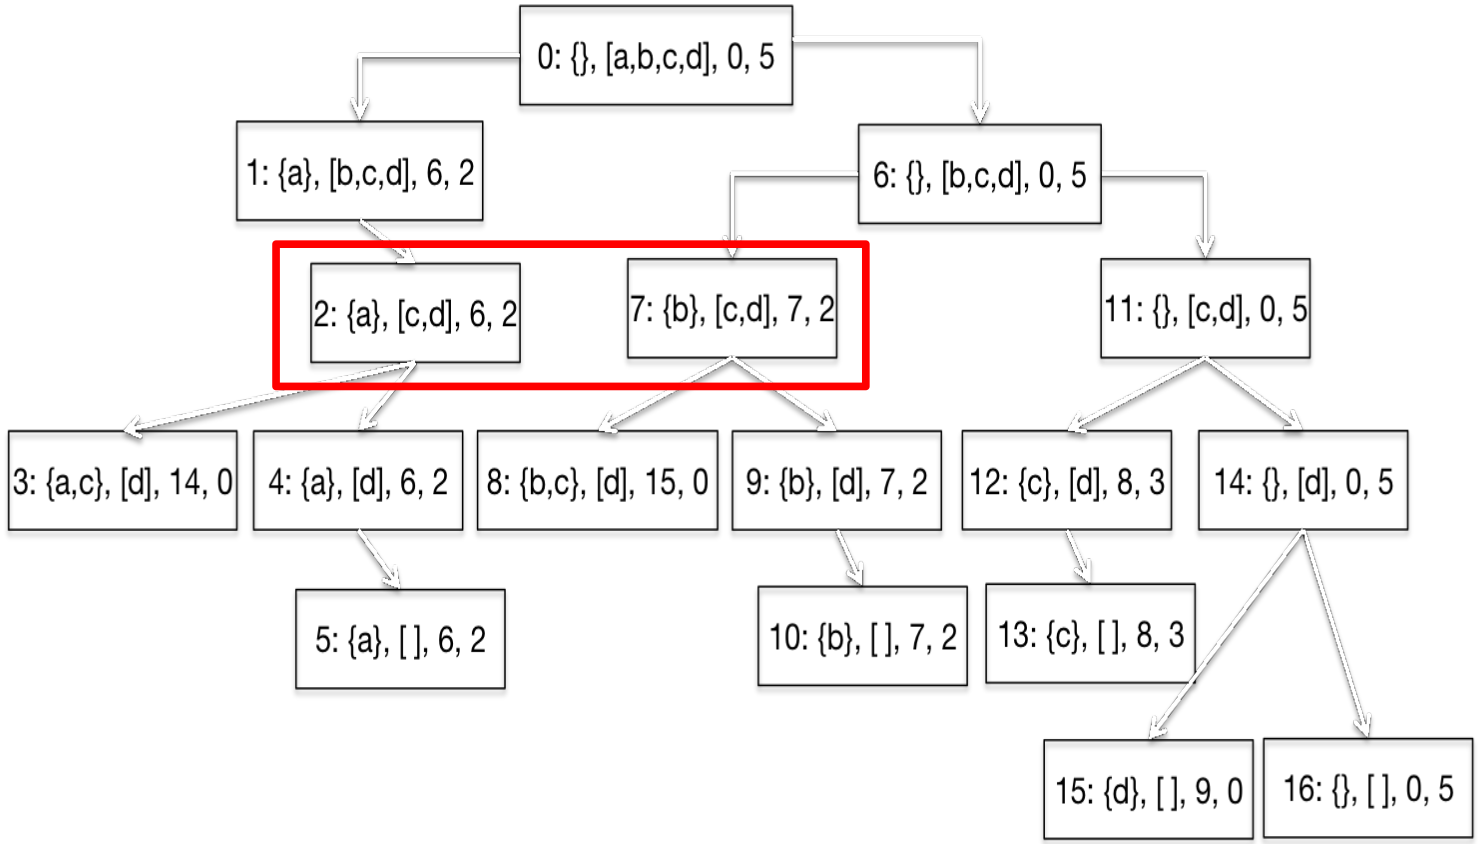

Below we construct a dynamic programming solution for the knapsack problem. In this case, we will use a dictionary (``memo``) to store the solutions obtained.

Intuition tells us that the dictionary key should be a tuple formed by the list of remaining items and the remaining capacity. However, this would lead to difficulties in searching our table, because we would have to **check each item in the list to verify that it is the same list**.

One way to get around this is to consider only the size of the list. Note in the tree above that, since the items are considered in the order in which they are in the initial list and are removed from the list as new subproblems are generated, the size of the list of remaining items indicates the list itself. Thus, the list of size 3 will be the one that contains the items $b$, $c$ and $d$, in that order; the list of size 2 will be the list that contains the items $c$ and $d$, in that order; and the list of size 1 will be the one that contains only the item $d$. Thus, the ``memo`` dictionary is organized as follows:

(remaining_list_size,remaining_capacity)->solution

In [ ]:
def util(item):
  return objetos[item][0]

def peso(item):
  return objetos[item][1]

def buscaEmArvoreComPD(restantes, capDisp, memo):
    """busca recursiva em profundidade com Programação Dinâmica
       restantes é uma lista dos itens que ainda não foram adicionados,
       capDisp é a capacidade disponível na mochila,
       memo é um dicionário que armazena soluções já obtidas
       Retorna uma tupla com a utilidade total da solução do problema da mochila
         e os itens dessa solução"""

    if (len(restantes),capDisp) in memo:
        print("Problema sobreposto:", [restantes,capDisp])
        result = memo[(len(restantes),capDisp)]
    elif restantes == [] or capDisp == 0:
        result = (0, ())
    elif peso(restantes[0]) > capDisp:
        #Explora apenas o lado direito
        result = buscaEmArvoreComPD(restantes[1:], capDisp, memo)
    else:
        itemAtual = restantes[0]
        #Explora o lado esquerdo
        utilComItem, solComItem = buscaEmArvoreComPD(restantes[1:],
                                     capDisp - peso(itemAtual), memo)
        utilComItem += util(itemAtual)
        #Explora o lado direito
        utilSemItem, solSemItem = buscaEmArvoreComPD(restantes[1:],
                                     capDisp, memo)
        #Escolhe o melhor lado
        if utilComItem > utilSemItem:
            result = (utilComItem, solComItem + (itemAtual,))
        else:
            result = (utilSemItem, solSemItem)
    memo[(len(restantes), capDisp)] = result
    return result

buscaEmArvoreComPD(list(objetos.keys()),1000,{})

(398, ('Maçã', 'Coca', 'Sanduíche', 'Cerveja', 'Vinho'))